# Time Series Data Analysis

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
df = pd.read_csv(r'..\PRSA_Data_20130301-20170228\PRSA_Data_Dingling_20130301-20170228.csv')
df.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0  82.0  -2.3   
1   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0  80.0  -2.5   
2   3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0  79.0  -3.0   
3   4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0  79.0  -3.6   
4   5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1020.8 -19.7   0.0    E   0.5  Dingling  
1  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  1022.3 -19.4   0.0    N   2.1  Dingling

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


### Merging the different parts of the date column into a single piece

In [97]:
# FUNCTION TO CONVERT DIFFERENT DATE COLUMNS AND COMBINE THEM INTO 1 COLUMN
def convert_to_date(x):
    return datetime.strptime(x, '%Y %m %d %H')

In [98]:
aq_df = pd.read_csv(r'..\PRSA_Data_20130301-20170228\PRSA_Data_Dingling_20130301-20170228.csv',
                    parse_dates = [['year', 'month', 'day', 'hour']],
                    date_parser = convert_to_date,
                    keep_date_col = True)
aq_df.head()

year_month_day_hour  No  year month day hour  PM2.5  PM10  SO2  NO2     CO  \
0 2013-03-01 00:00:00   1  2013     3   1    0    4.0   4.0  3.0  NaN  200.0   
1 2013-03-01 01:00:00   2  2013     3   1    1    7.0   7.0  3.0  NaN  200.0   
2 2013-03-01 02:00:00   3  2013     3   1    2    5.0   5.0  3.0  2.0  200.0   
3 2013-03-01 03:00:00   4  2013     3   1    3    6.0   6.0  3.0  NaN  200.0   
4 2013-03-01 04:00:00   5  2013     3   1    4    5.0   5.0  3.0  NaN  200.0   

     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
0  82.0  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
1  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  81.0  -3.5  1022.3 -19.4   0.0    N   2.1  Dingling

In [99]:
aq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month_day_hour  35064 non-null  datetime64[ns]
 1   No                   35064 non-null  int64         
 2   year                 35064 non-null  object        
 3   month                35064 non-null  object        
 4   day                  35064 non-null  object        
 5   hour                 35064 non-null  object        
 6   PM2.5                34285 non-null  float64       
 7   PM10                 34408 non-null  float64       
 8   SO2                  34334 non-null  float64       
 9   NO2                  33830 non-null  float64       
 10  CO                   33052 non-null  float64       
 11  O3                   33850 non-null  float64       
 12  TEMP                 35011 non-null  float64       
 13  PRES                 35014 non-

### Converting the month column into numeric column

In [8]:
aq_df['month'] = pd.to_numeric(aq_df['month'])

In [100]:
aq_df.isnull().any() 

year_month_day_hour    False
No                     False
year                   False
month                  False
day                    False
hour                   False
PM2.5                   True
PM10                    True
SO2                     True
NO2                     True
CO                      True
O3                      True
TEMP                    True
PRES                    True
DEWP                    True
RAIN                    True
wd                      True
WSPM                    True
station                False
dtype: bool

In [101]:
aq_df.nunique()

year_month_day_hour    35064
No                     35064
year                       5
month                     12
day                       31
hour                      24
PM2.5                    486
PM10                     554
SO2                      327
NO2                      636
CO                       103
O3                       792
TEMP                     998
PRES                     593
DEWP                     602
RAIN                     116
wd                        16
WSPM                      95
station                    1
dtype: int64

In [102]:
aq_df.shape

(35064, 19)

In [103]:
aq_df.describe()

No         PM2.5          PM10           SO2           NO2  \
count  35064.000000  34285.000000  34408.000000  34334.000000  33830.000000   
mean   17532.500000     65.989497     83.739723     11.749650     27.585467   
std    10122.249256     72.267723     79.541685     15.519259     26.383882   
min        1.000000      3.000000      2.000000      0.285600      1.026500   
25%     8766.750000     14.000000     26.000000      2.000000      9.000000   
50%    17532.500000     41.000000     60.000000      5.000000     19.000000   
75%    26298.250000     93.000000    117.000000     15.000000     38.000000   
max    35064.000000    881.000000    905.000000    156.000000    205.000000   

                 CO            O3          TEMP          PRES          DEWP  \
count  33052.000000  33850.000000  35011.000000  35014.000000  35011.000000   
mean     904.896073     68.548371     13.686111   1007.760278      1.505495   
std      903.306220     53.764424     11.365313     10.225664     13.822099   
min      100.000000      0.214200    -16.600000    982.400000    -35.100000   
25%      300.000000     31.000000      3.400000    999.300000    -10.200000   
50%      600.000000     61.000000     14.700000   1007.400000      1.800000   
75%     1200.000000     90.000000     23.300000   1016.000000     14.200000   
max    10000.000000    500.000000     41.400000   1036.500000     27.200000   

               RAIN          WSPM  
count  35013.000000  35021.000000  
mean       0.060366      1.853836  
std        0.752899      1.309808  
min        0.000000      0.000000  
25%        0.000000      1.000000  
50%        0.000000      1.500000  
75%        0.000000      2.300000  
max       52.100000     10.000000

In [104]:
aq_df_non_indexed = aq_df.copy() # COPYING THE DATA THEN WILL PROCESS FURTHER FROM THE COPYIED ONE

### Setting the index because a lot of plots in the time series data requires indexing 

In [105]:
aq_df = aq_df.set_index('year_month_day_hour')

In [106]:
aq_df.index

DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 01:00:00',
               '2013-03-01 02:00:00', '2013-03-01 03:00:00',
               '2013-03-01 04:00:00', '2013-03-01 05:00:00',
               '2013-03-01 06:00:00', '2013-03-01 07:00:00',
               '2013-03-01 08:00:00', '2013-03-01 09:00:00',
               ...
               '2017-02-28 14:00:00', '2017-02-28 15:00:00',
               '2017-02-28 16:00:00', '2017-02-28 17:00:00',
               '2017-02-28 18:00:00', '2017-02-28 19:00:00',
               '2017-02-28 20:00:00', '2017-02-28 21:00:00',
               '2017-02-28 22:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='year_month_day_hour', length=35064, freq=None)

In [107]:
aq_df.head()

No  year month day hour  PM2.5  PM10  SO2  NO2     CO  \
year_month_day_hour                                                          
2013-03-01 00:00:00   1  2013     3   1    0    4.0   4.0  3.0  NaN  200.0   
2013-03-01 01:00:00   2  2013     3   1    1    7.0   7.0  3.0  NaN  200.0   
2013-03-01 02:00:00   3  2013     3   1    2    5.0   5.0  3.0  2.0  200.0   
2013-03-01 03:00:00   4  2013     3   1    3    6.0   6.0  3.0  NaN  200.0   
2013-03-01 04:00:00   5  2013     3   1    4    5.0   5.0  3.0  NaN  200.0   

                       O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
year_month_day_hour                                                       
2013-03-01 00:00:00  82.0  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
2013-03-01 01:00:00  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2013-03-01 02:00:00  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
2013-03-01 03:00:00  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
2013-03-01 04:00:00  81.0  -3.5  1022.3 -19.4   0.0    N   2.1  Dingling

In [108]:
aq_df.loc['2013-03-01':'2013-03-06']

No  year month day hour  PM2.5   PM10   SO2    NO2  \
year_month_day_hour                                                        
2013-03-01 00:00:00    1  2013     3   1    0    4.0    4.0   3.0    NaN   
2013-03-01 01:00:00    2  2013     3   1    1    7.0    7.0   3.0    NaN   
2013-03-01 02:00:00    3  2013     3   1    2    5.0    5.0   3.0    2.0   
2013-03-01 03:00:00    4  2013     3   1    3    6.0    6.0   3.0    NaN   
2013-03-01 04:00:00    5  2013     3   1    4    5.0    5.0   3.0    NaN   
...                  ...   ...   ...  ..  ...    ...    ...   ...    ...   
2013-03-06 19:00:00  140  2013     3   6   19  269.0  274.0  87.0  139.0   
2013-03-06 20:00:00  141  2013     3   6   20  280.0  284.0  78.0  141.0   
2013-03-06 21:00:00  142  2013     3   6   21  306.0  317.0  83.0  144.0   
2013-03-06 22:00:00  143  2013     3   6   22  284.0  285.0  76.0  140.0   
2013-03-06 23:00:00  144  2013     3   6   23  236.0  245.0  77.0  134.0   

                         CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
year_month_day_hour                                                      
2013-03-01 00:00:00   200.0  82.0  -2.3  1020.8 -19.7   0.0    E   0.5   
2013-03-01 01:00:00   200.0  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7   
2013-03-01 02:00:00   200.0  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2   
2013-03-01 03:00:00   200.0  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0   
2013-03-01 04:00:00   200.0  81.0  -3.5  1022.3 -19.4   0.0    N   2.1   
...                     ...   ...   ...     ...   ...   ...  ...   ...   
2013-03-06 19:00:00  2500.0  52.0   7.1  1004.5  -3.5   0.0  NNW   1.4   
2013-03-06 20:00:00  3299.0  52.0   6.2  1004.9  -3.5   0.0   SE   0.7   
2013-03-06 21:00:00  3100.0  52.0   5.5  1004.5  -3.6   0.0  ENE   0.6   
2013-03-06 22:00:00  2700.0  52.0   4.7  1004.3  -3.6   0.0    E   0.7   
2013-03-06 23:00:00  2500.0  52.0   4.5  1004.1  -3.3   0.0    S   0.9   

                      station  
year_month_day_hour            
2013-03-01 00:00:00  Dingling  
2013-03-01 01:00:00  Dingling  
2013-03-01 02:00:00  Dingling  
2013-03-01 03:00:00  Dingling  
2013-03-01 04:00:00  Dingling  
...                       ...  
2013-03-06 19:00:00  Dingling  
2013-03-06 20:00:00  Dingling  
2013-03-06 21:00:00  Dingling  
2013-03-06 22:00:00  Dingling  
2013-03-06 23:00:00  Dingling  

[144 rows x 18 columns]

In [109]:
aq_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  object 
 2   month    35064 non-null  object 
 3   day      35064 non-null  object 
 4   hour     35064 non-null  object 
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(1), object(6)
memory usage: 6.1+ MB


In [111]:
aq_df.loc['2013' : '2015']

No  year month day hour  PM2.5   PM10   SO2   NO2  \
year_month_day_hour                                                         
2013-03-01 00:00:00      1  2013     3   1    0    4.0    4.0   3.0   NaN   
2013-03-01 01:00:00      2  2013     3   1    1    7.0    7.0   3.0   NaN   
2013-03-01 02:00:00      3  2013     3   1    2    5.0    5.0   3.0   2.0   
2013-03-01 03:00:00      4  2013     3   1    3    6.0    6.0   3.0   NaN   
2013-03-01 04:00:00      5  2013     3   1    4    5.0    5.0   3.0   NaN   
...                    ...   ...   ...  ..  ...    ...    ...   ...   ...   
2015-12-31 19:00:00  24860  2015    12  31   19   85.0   95.0  12.0  73.0   
2015-12-31 20:00:00  24861  2015    12  31   20    NaN  109.0  32.0  79.0   
2015-12-31 21:00:00  24862  2015    12  31   21   80.0  100.0  35.0  81.0   
2015-12-31 22:00:00  24863  2015    12  31   22   93.0   93.0  28.0  76.0   
2015-12-31 23:00:00  24864  2015    12  31   23   98.0   98.0  25.0  75.0   

                         CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
year_month_day_hour                                                      
2013-03-01 00:00:00   200.0  82.0  -2.3  1020.8 -19.7   0.0    E   0.5   
2013-03-01 01:00:00   200.0  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7   
2013-03-01 02:00:00   200.0  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2   
2013-03-01 03:00:00   200.0  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0   
2013-03-01 04:00:00   200.0  81.0  -3.5  1022.3 -19.4   0.0    N   2.1   
...                     ...   ...   ...     ...   ...   ...  ...   ...   
2015-12-31 19:00:00  1200.0   2.0  -0.6  1021.0  -9.5   0.0   NE   0.6   
2015-12-31 20:00:00  2900.0   2.0  -1.8  1021.2  -9.9   0.0   NW   1.1   
2015-12-31 21:00:00  3200.0   2.0  -1.6  1020.8  -9.7   0.0   NE   0.9   
2015-12-31 22:00:00  3500.0   2.0  -2.9  1020.4  -9.8   0.0  NNW   1.3   
2015-12-31 23:00:00  3600.0   2.0  -3.5  1020.2  -9.7   0.0  NNW   1.3   

                      station  
year_month_day_hour            
2013-03-01 00:00:00  Dingling  
2013-03-01 01:00:00  Dingling  
2013-03-01 02:00:00  Dingling  
2013-03-01 03:00:00  Dingling  
2013-03-01 04:00:00  Dingling  
...                       ...  
2015-12-31 19:00:00  Dingling  
2015-12-31 20:00:00  Dingling  
2015-12-31 21:00:00  Dingling  
2015-12-31 22:00:00  Dingling  
2015-12-31 23:00:00  Dingling  

[24864 rows x 18 columns]

### Taking only the PM2.5 column

In [112]:
pm_data = aq_df['PM2.5']
pm_data.head()

year_month_day_hour
2013-03-01 00:00:00    4.0
2013-03-01 01:00:00    7.0
2013-03-01 02:00:00    5.0
2013-03-01 03:00:00    6.0
2013-03-01 04:00:00    5.0
Name: PM2.5, dtype: float64

<AxesSubplot:xlabel='year_month_day_hour'>

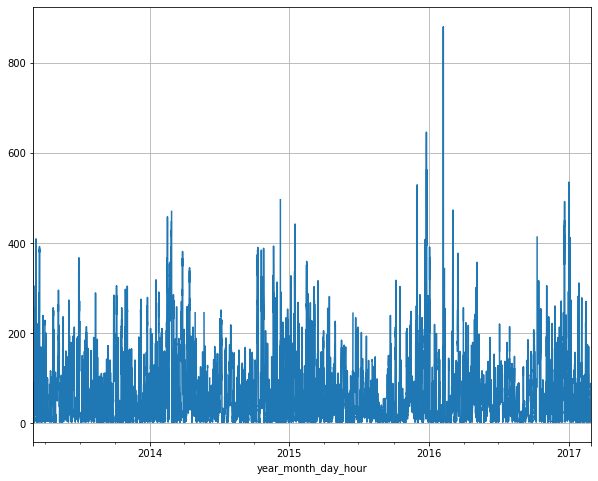

In [113]:
plt.figure(figsize=(10,8))
pm_data.plot(grid=True)

### Now lets plot the data year by year so that it will be more clear if the pattern is repeating or not

In [114]:
aq_df_2015 = aq_df.loc['2015']
pm_data_2015 = aq_df_2015['PM2.5']

<AxesSubplot:xlabel='year_month_day_hour'>

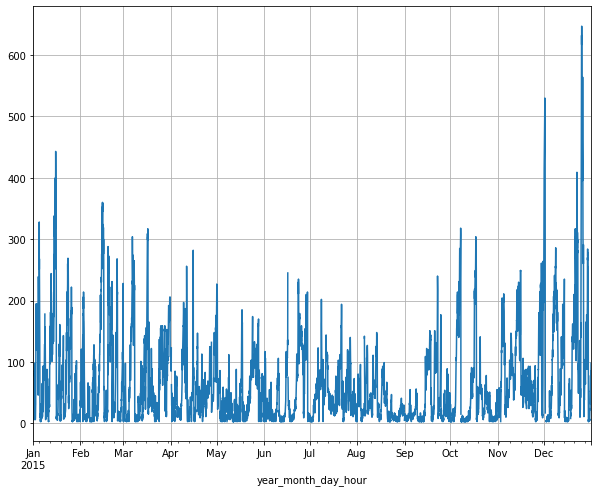

In [115]:
plt.figure(figsize=(10,8))
pm_data_2015.plot(grid=True)

<AxesSubplot:xlabel='year_month_day_hour'>

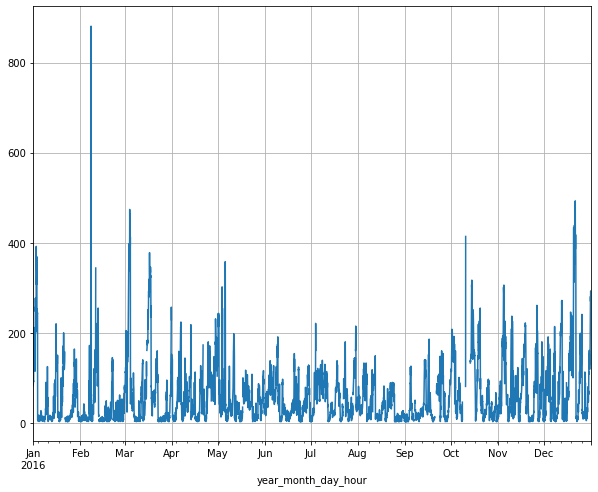

In [116]:
aq_df_2015 = aq_df.loc['2016']
pm_data_2015 = aq_df_2015['PM2.5']
plt.figure(figsize=(10,8))
pm_data_2015.plot(grid=True)

### Visualizing all at once

In [117]:
import plotly.express as px
fig = px.line(aq_df_non_indexed, x='year_month_day_hour', y='PM2.5', title='with Slider')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [118]:
import plotly.express as px
fig = px.line(aq_df_non_indexed, x='year_month_day_hour', y='PM2.5', title='Graph with Slider')

fig.update_xaxes(rangeslider_visible=True,
                 rangeselector=dict(
                 buttons=list([
                     dict(count=1, label="1y", step="year", stepmode="backward"),
                     dict(count=2, label="2y", step="year", stepmode="backward"),
                     dict(count=3, label="3y", step="year", stepmode="backward"),
                     dict(step="all")
                 ])))
fig.show()

### Overlaying 2 variables data like eg. 2014 and 2015

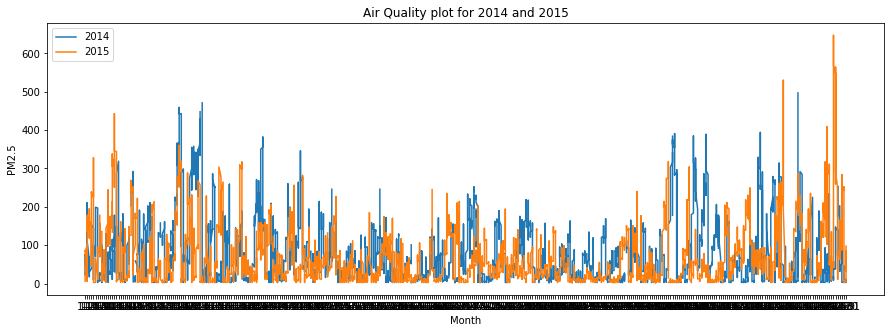

In [123]:
# CREATE 2 DATAFRAMES FIRST AND STORE THE REQUIRED INFO TO PLOT 
plt.figure(figsize=(15,5))

df_2014 = aq_df.loc['2014'].reset_index()
df_2015 = aq_df.loc['2015'].reset_index()

df_2014['month_day_hour']= df_2014.apply(lambda x:str(x['month'])+'-'+x['day'], axis=1)
df_2015['month_day_hour']= df_2015.apply(lambda x:str(x['month'])+'-'+x['day'], axis=1)

plt.plot(df_2014['month_day_hour'], df_2014['PM2.5'])
plt.plot(df_2015['month_day_hour'], df_2015['PM2.5'])

plt.legend(['2014', '2015'])
plt.xlabel('Month')
plt.ylabel('PM2.5')
plt.title('Air Quality plot for 2014 and 2015')
plt.show()

### Lets do the Univariate analysis of the PM2.5

In [124]:
aq_df.loc['2014' : '2015'][['month', 'PM2.5']].groupby('month').describe()

PM2.5                                                        
        count        mean         std  min   25%   50%     75%    max
month                                                                
1      1451.0   78.548518   77.606663  3.0  14.0  51.0  123.50  443.0
10     1462.0   85.192202   98.772074  3.0  11.0  43.0  119.75  391.0
11     1424.0   78.360815   74.184162  3.0  20.0  55.0  111.00  394.0
12     1450.0   84.130345  107.521023  3.0  10.0  38.0  128.00  647.0
2      1292.0  113.558050  113.420308  3.0  16.0  74.0  178.25  548.0
3      1481.0   79.109926   79.641550  3.0  15.0  46.0  129.00  382.0
4      1404.0   71.699288   58.891713  3.0  28.0  57.0   98.00  346.0
5      1471.0   46.748946   41.730736  3.0  15.0  33.0   68.00  246.0
6      1401.0   45.360314   47.019916  3.0  11.0  24.0   64.00  245.0
7      1472.0   63.956929   54.652537  3.0  21.0  48.0   97.00  252.0
8      1472.0   43.440149   39.967375  3.0  13.0  30.0   61.00  217.0
9      1410.0   46.176312   43.755986  3.0  11.0  28.0   79.00  240.0

### Lets do the Bivariate analysis of PM2.5 and TEMP

In [125]:
aq_df['2014':'2016'][['month', 'PM2.5', 'TEMP']].groupby('month').agg({'PM2.5':['max'], 'TEMP' : {'min', 'max'}})

PM2.5  TEMP      
         max   min   max
month                   
1      443.0 -16.6  12.4
10     414.0  -1.4  28.1
11     394.0 -10.3  20.8
12     647.0  -9.7  11.6
2      881.0 -10.9  14.0
3      474.0  -6.4  26.0
4      346.0   1.3  32.0
5      358.0   7.0  41.4
6      245.0  15.1  38.1
7      252.0  16.8  39.2
8      217.0  16.6  36.3
9      240.0   7.8  34.5

### Plotting 2015 data .. PM2.5 and TEMP

d:\anacondafiles\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



<Figure size 1080x360 with 0 Axes>

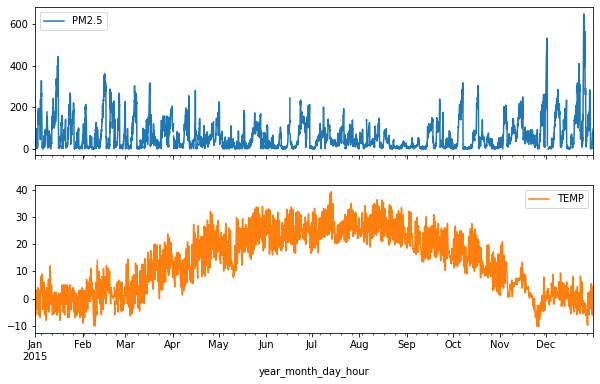

In [126]:
plt.figure(figsize=(15,5))

aq_df_2015 = aq_df['2015'] # TAKING ONLY 2015 YEAR DATA
pm_data_2015 = aq_df_2015[['PM2.5', 'TEMP']] # FROM THE 2015 DATA ... CONSIDERING ONLY 2 COLUMNS FOR PLOTTING
pm_data_2015.plot(subplots=True, figsize=(10,6))
plt.show()

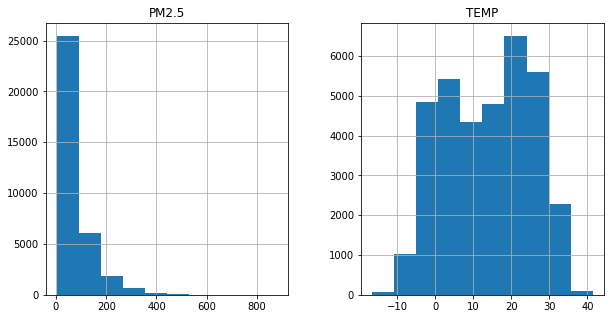

In [128]:
aq_df[['PM2.5', 'TEMP']].hist(figsize=(10,5)) # HISTOGRAM PLOT OF THESE 2 COLUMNS
plt.show()

<AxesSubplot:ylabel='Density'>

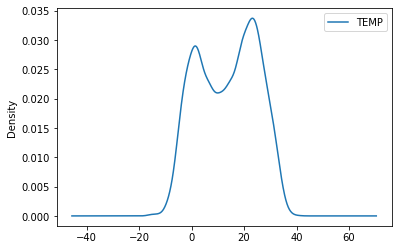

In [38]:
# DENSITY PLOT FOR THE TEMP COLUMN TO CHECK THE DISTRIBUTION OF THE DATA
aq_df[['TEMP']].plot(kind='density') # 2 SPIKES ARE THERE SO ... BIMODAL DISTRIBUTION

### Lag Plot : 

    Its a special kind of scatter plot where the x-axis is the current time & y-axis is the lag period
    by default the lag period is 1. when the lag period is 1 then its known as first order lag plot.
    when lag period is 2 then second order lag plot...
    
    Lag plot can be used in multiple sceneriaos ..
    1. Linearity
    2. Outliers
    3. Randomness
    4. Serial correlation or auto correlation
    
    Why do we need it ??
    We need lag plot to understand the data properly ... and also sometimes to correct the trend or stationary we do some
    smoothing functions

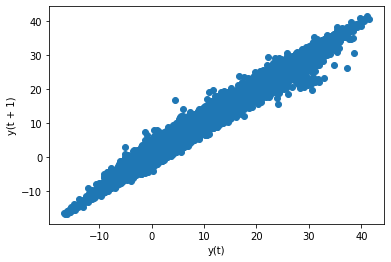

In [43]:
# HERE WE CAN OBSERVE THAT THE TEMPERATURE DONT RISE OR VARY THAT MUCH HOURLY..
pd.plotting.lag_plot(aq_df['TEMP'], lag=1) # LAG OF 1 HOUR
plt.show()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 10)'>

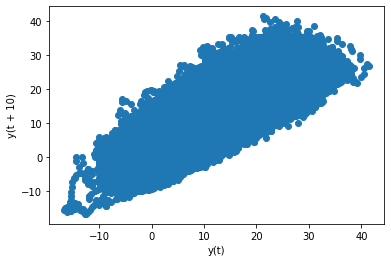

In [45]:
pd.plotting.lag_plot(aq_df['TEMP'], lag=10) # PUTTING LAG OF 10 HOURS

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 24)'>

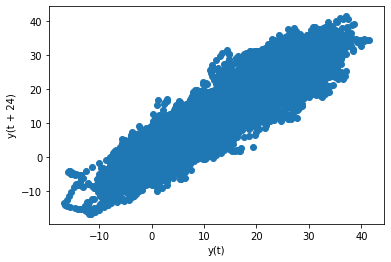

In [46]:
pd.plotting.lag_plot(aq_df['TEMP'], lag=24) # PUTTING LAG OF 20 HOURS

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 8640)'>

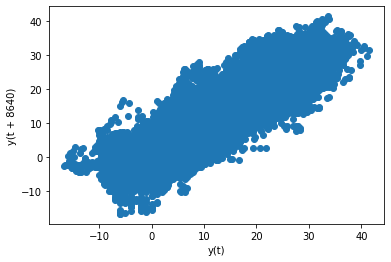

In [47]:
pd.plotting.lag_plot(aq_df['TEMP'], lag=8640) # PUTTING LAG OF 1 YEAR ... 24 DATA PTS PER DAY * 365 DAYS A YEAR

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 4320)'>

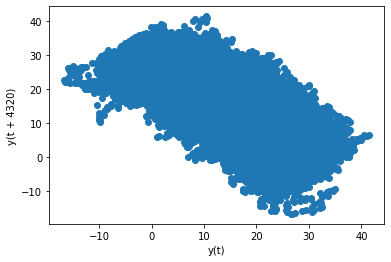

In [51]:
pd.plotting.lag_plot(aq_df['TEMP'], lag=4320) # PUTTING LAG OF 6 MONTHS 24*180

# THERE IS SOME NEGATIVE CORRELATION

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 2150)'>

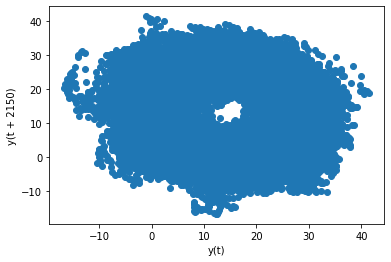

In [55]:
pd.plotting.lag_plot(aq_df['TEMP'], lag=2150) # PUTTING LAG OF 3 MONTHS 24*180


d:\anacondafiles\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



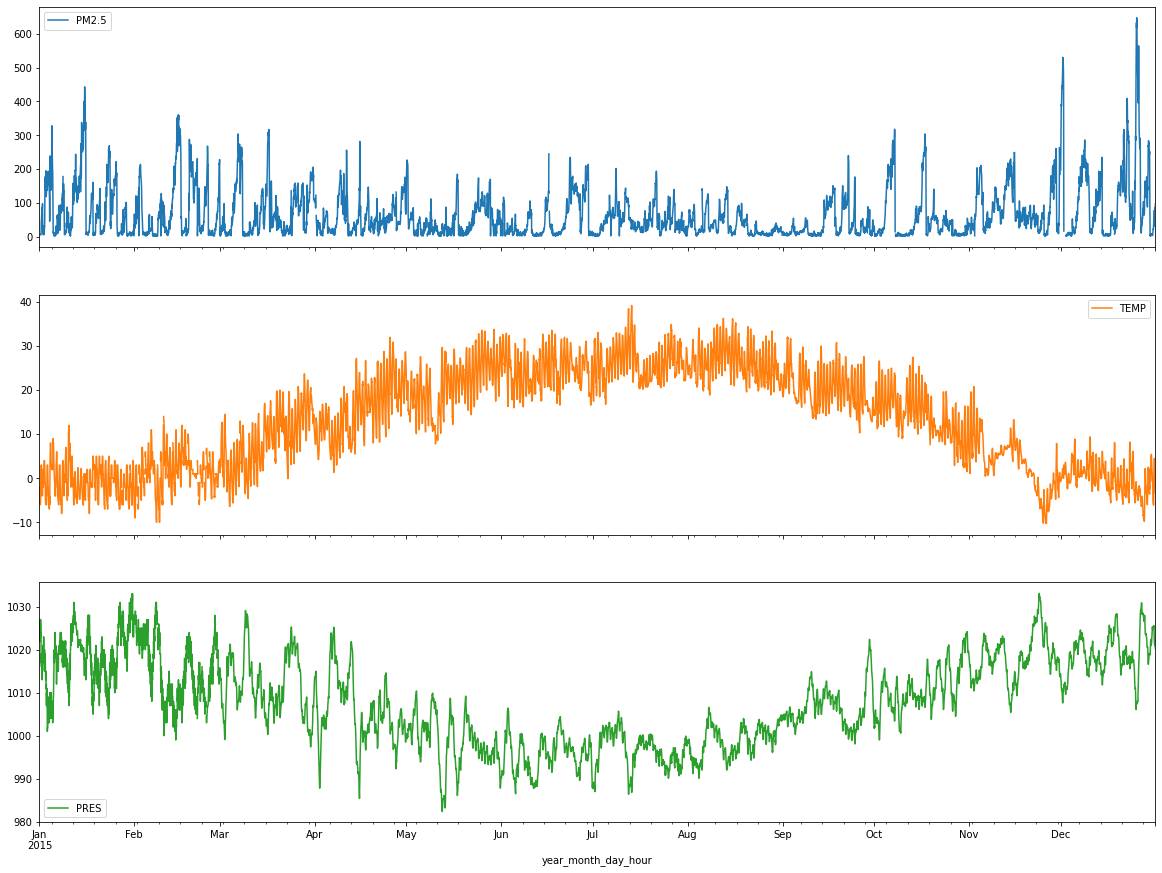

In [132]:
aq_df_2015 = aq_df['2015']
pm_data_2015=aq_df_2015[['PM2.5', 'TEMP', 'PRES']]
pm_data_2015.plot(subplots=True, figsize=(20,15))
plt.show()

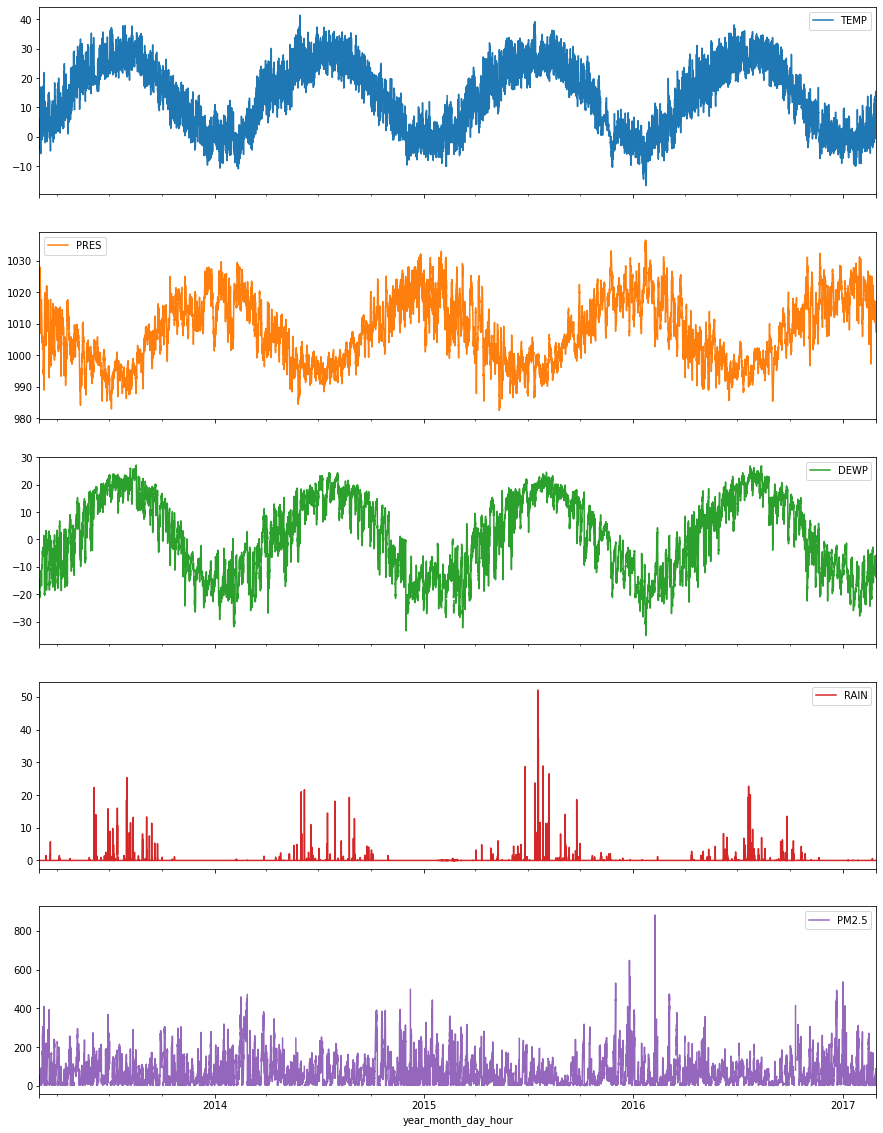

In [134]:
multi_data = aq_df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'PM2.5']]
multi_data.plot(subplots=True, figsize=(15,20))
plt.show()

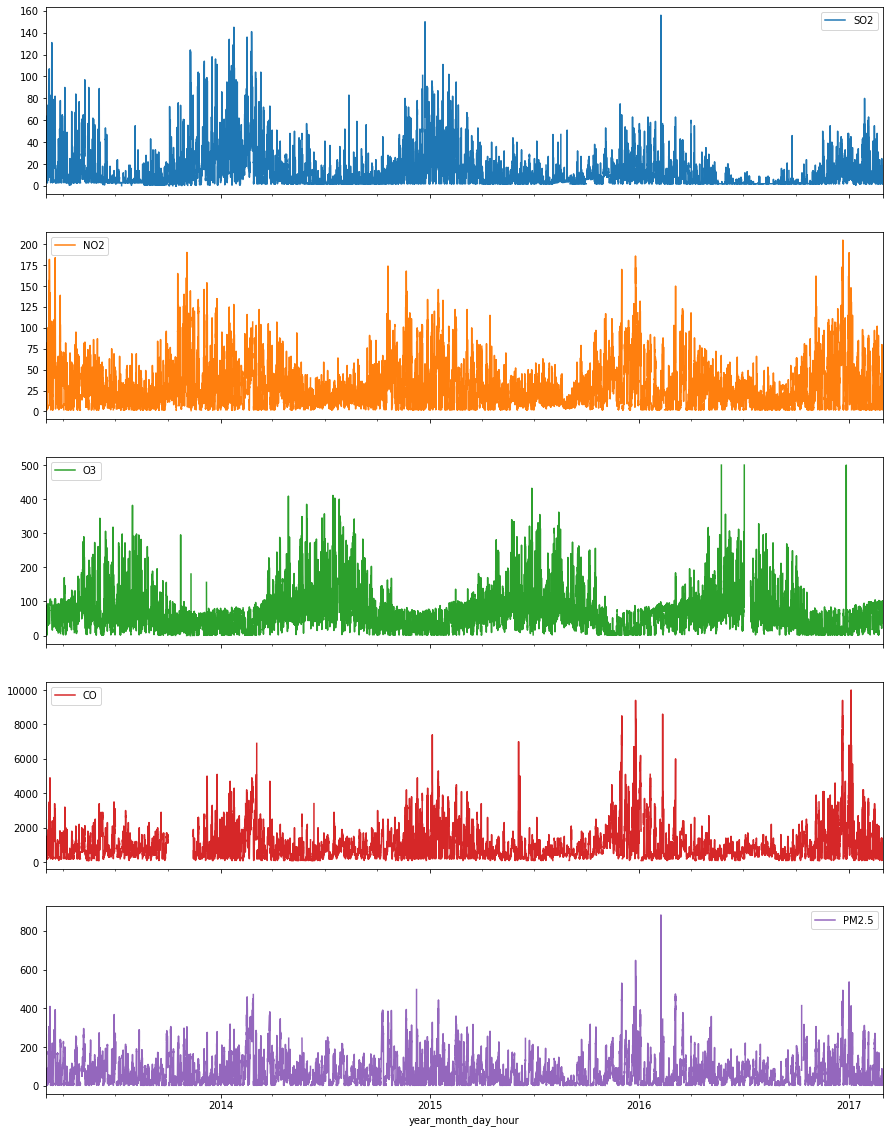

In [135]:
multi_data = aq_df[['SO2', 'NO2', 'O3', 'CO', 'PM2.5']]
multi_data.plot(subplots=True, figsize=(15,20))
plt.show()

Text(0.5, 0, 'year_month_day_hour')

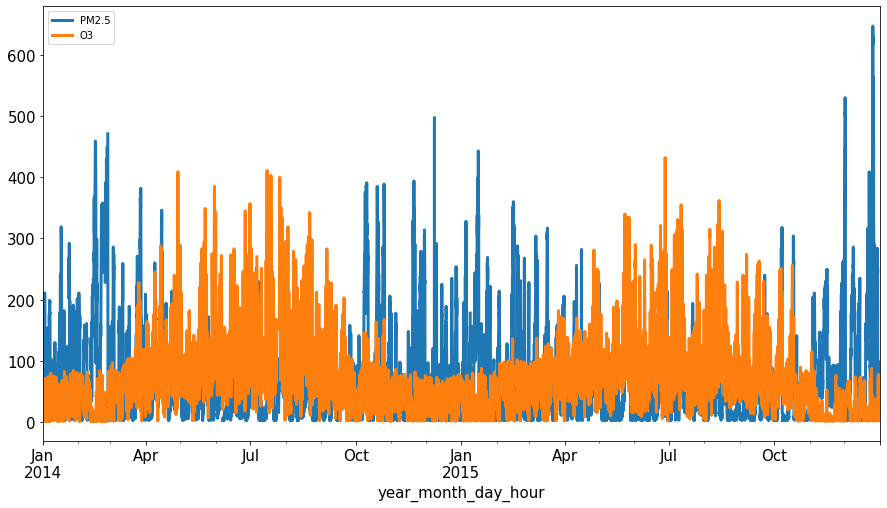

In [67]:
aq_df['2014':'2015'][['PM2.5', 'O3']].plot(figsize=(15,8), linewidth=3, fontsize=15)
plt.xlabel('year_month_day_hour', fontsize=15)

### PM2.5 is having some null values... but we need to fix this rather than dropping this because the time series data is continous data and if we drop some in between then the continuity is gone

In [68]:
aq_df_2015['PM2.5']

year_month_day_hour
2015-01-01 00:00:00     NaN
2015-01-01 01:00:00     NaN
2015-01-01 02:00:00     NaN
2015-01-01 03:00:00     NaN
2015-01-01 04:00:00     NaN
                       ... 
2015-12-31 19:00:00    85.0
2015-12-31 20:00:00     NaN
2015-12-31 21:00:00    80.0
2015-12-31 22:00:00    93.0
2015-12-31 23:00:00    98.0
Name: PM2.5, Length: 8760, dtype: float64

In [70]:
aq_df_2015 # NOT ONLY PM2.5 ... BUT OTHER COLUMNS ARE ALSO HAVING NULL VALUES

No  year  month day hour  PM2.5   PM10   SO2   NO2  \
year_month_day_hour                                                          
2015-01-01 00:00:00  16105  2015      1   1    0    NaN    NaN   NaN   NaN   
2015-01-01 01:00:00  16106  2015      1   1    1    NaN    NaN   NaN   NaN   
2015-01-01 02:00:00  16107  2015      1   1    2    NaN    NaN   NaN   NaN   
2015-01-01 03:00:00  16108  2015      1   1    3    NaN    NaN   NaN   NaN   
2015-01-01 04:00:00  16109  2015      1   1    4    NaN    NaN   NaN   NaN   
...                    ...   ...    ...  ..  ...    ...    ...   ...   ...   
2015-12-31 19:00:00  24860  2015     12  31   19   85.0   95.0  12.0  73.0   
2015-12-31 20:00:00  24861  2015     12  31   20    NaN  109.0  32.0  79.0   
2015-12-31 21:00:00  24862  2015     12  31   21   80.0  100.0  35.0  81.0   
2015-12-31 22:00:00  24863  2015     12  31   22   93.0   93.0  28.0  76.0   
2015-12-31 23:00:00  24864  2015     12  31   23   98.0   98.0  25.0  75.0   

                         CO   O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
year_month_day_hour                                                     
2015-01-01 00:00:00     NaN  NaN  -4.0  1025.0 -23.7   0.0   NW   3.3   
2015-01-01 01:00:00     NaN  NaN  -2.0  1022.0 -22.6   0.0  NNE   1.2   
2015-01-01 02:00:00     NaN  NaN  -5.0  1022.0 -23.5   0.0  NNW   1.7   
2015-01-01 03:00:00     NaN  NaN  -5.0  1023.0 -23.5   0.0    N   1.7   
2015-01-01 04:00:00     NaN  NaN  -5.0  1024.0 -24.0   0.0   NE   1.8   
...                     ...  ...   ...     ...   ...   ...  ...   ...   
2015-12-31 19:00:00  1200.0  2.0  -0.6  1021.0  -9.5   0.0   NE   0.6   
2015-12-31 20:00:00  2900.0  2.0  -1.8  1021.2  -9.9   0.0   NW   1.1   
2015-12-31 21:00:00  3200.0  2.0  -1.6  1020.8  -9.7   0.0   NE   0.9   
2015-12-31 22:00:00  3500.0  2.0  -2.9  1020.4  -9.8   0.0  NNW   1.3   
2015-12-31 23:00:00  3600.0  2.0  -3.5  1020.2  -9.7   0.0  NNW   1.3   

                      station  
year_month_day_hour            
2015-01-01 00:00:00  Dingling  
2015-01-01 01:00:00  Dingling  
2015-01-01 02:00:00  Dingling  
2015-01-01 03:00:00  Dingling  
2015-01-01 04:00:00  Dingling  
...                       ...  
2015-12-31 19:00:00  Dingling  
2015-12-31 20:00:00  Dingling  
2015-12-31 21:00:00  Dingling  
2015-12-31 22:00:00  Dingling  
2015-12-31 23:00:00  Dingling  

[8760 rows x 18 columns]

In [71]:
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

### showing the regular correlation between 2 different variables 

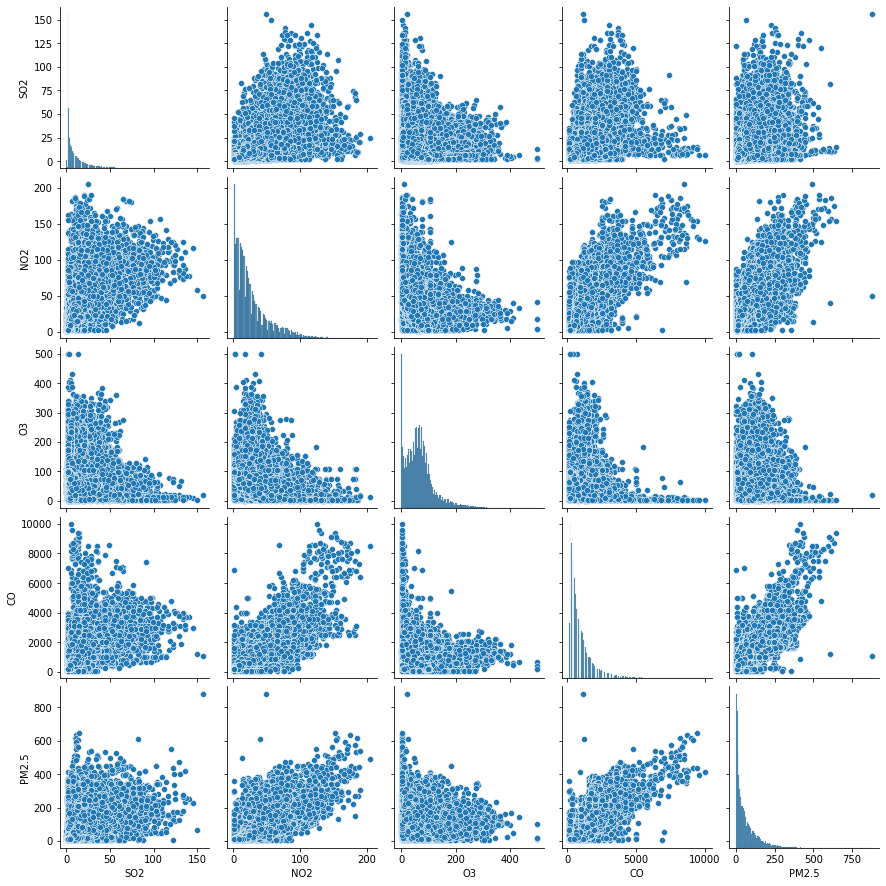

In [73]:
g = sns.pairplot(aq_df[['SO2', 'NO2', 'O3', 'CO', 'PM2.5']])

In [74]:
aq_df[['SO2', 'NO2', 'O3', 'CO', 'PM2.5']].corr(method='pearson')

SO2       NO2        O3        CO     PM2.5
SO2    1.000000  0.610433 -0.182096  0.529182  0.475117
NO2    0.610433  1.000000 -0.373625  0.798753  0.718170
O3    -0.182096 -0.373625  1.000000 -0.303275 -0.100542
CO     0.529182  0.798753 -0.303275  1.000000  0.802737
PM2.5  0.475117  0.718170 -0.100542  0.802737  1.000000

<AxesSubplot:>

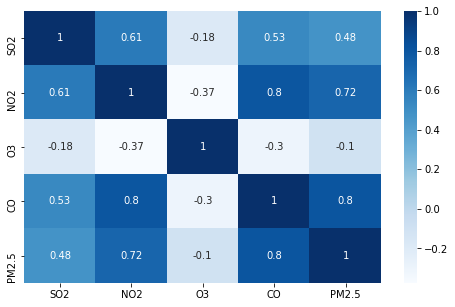

In [81]:
plt.figure(figsize=(8,5))
sns.heatmap(aq_df[['SO2', 'NO2', 'O3', 'CO', 'PM2.5']].corr(method='pearson'), annot=True, cmap='Blues')

### Check the PM2.5 variable's correlation with other wind variable

In [139]:
aq_df.groupby('wd').agg(MEDIAN=('PM2.5', 'median'), MEANN=('PM2.5', 'mean'), MAXXX=('PM2.5', 'max'), min=('PM2.5', 'min')).reset_index()

wd  MEDIAN      MEANN  MAXXX  min
0     E    70.0  88.623363  434.0  3.0
1   ENE    56.5  77.685514  647.0  3.0
2   ESE    78.5  96.492276  632.0  3.0
3     N    29.0  57.546221  536.0  3.0
4    NE    32.0  57.390083  530.0  3.0
5   NNE    26.0  53.946239  881.0  3.0
6   NNW    33.0  62.790775  548.0  3.0
7    NW    21.0  52.769116  535.0  3.0
8     S    52.0  72.497281  511.0  3.0
9    SE    70.0  85.045709  617.0  3.0
10  SSE    61.0  79.925967  614.0  3.0
11  SSW    50.0  73.078253  493.0  3.0
12   SW    46.0  70.233140  459.0  3.0
13    W    22.0  49.488104  446.0  3.0
14  WNW    14.0  37.307447  515.0  3.0
15  WSW    39.0  66.725926  451.0  3.0

### Dropping the nan values and doing the auto correlation 

In [140]:
aq_df_na = aq_df.copy()
aq_df_na = aq_df_na.dropna()

### In Autocorrelation it tells the relation between the lagged value of the time series...

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

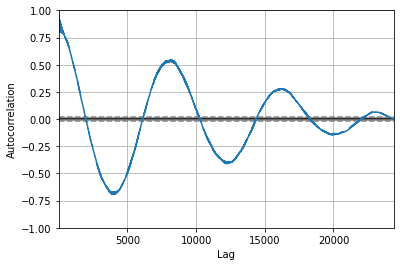

In [141]:
# TAKING THE 2014-2016
pd.plotting.autocorrelation_plot(aq_df_na['2014':'2016']['TEMP'])

# BUT HERE IT IS VERY HAZY YOU CAN SEE THAT AT 0 IT IS HAVING +VE THEN AGAIN AROUND 8000 IT IS RISING TO +VE WHICH IS ONE YEAR
#  SO NOW LETS VIEW THE SAME FOR 1 YEAR

In [143]:
aq_df_na.shape

(31306, 18)

In [145]:
aq_df_na['TEMP'].resample('1m').mean() # IF WE WRITE 1Y THEN ITS ONE YEAR, 1D THEN 1 DAY

year_month_day_hour
2013-03-31     6.039970
2013-04-30    12.208494
2013-05-31    21.886386
2013-06-30    23.752827
2013-07-31    27.405079
2013-08-31    27.228465
2013-09-30    20.482500
2013-10-31          NaN
2013-11-30     5.434524
2013-12-31     0.896623
2014-01-31     0.023428
2014-02-28    -0.352762
2014-03-31    10.415449
2014-04-30    17.235362
2014-05-31    22.043236
2014-06-30    25.194985
2014-07-31    28.409502
2014-08-31    26.284552
2014-09-30    20.834161
2014-10-31    13.556000
2014-11-30     6.357762
2014-12-31    -0.745582
2015-01-31    -0.590377
2015-02-28     1.572512
2015-03-31     8.707613
2015-04-30    15.566570
2015-05-31    21.300275
2015-06-30    24.636691
2015-07-31    26.228630
2015-08-31    26.135854
2015-09-30    20.392206
2015-10-31    14.387465
2015-11-30     3.358686
2015-12-31    -0.053912
2016-01-31    -4.233428
2016-02-29     1.434441
2016-03-31     8.687006
2016-04-30    16.262014
2016-05-31    20.793142
2016-06-30    25.481977
2016-07-31    25.839

### The dotted lines are 95% confidence intervals and the strong lines are 90% confidence intervals

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

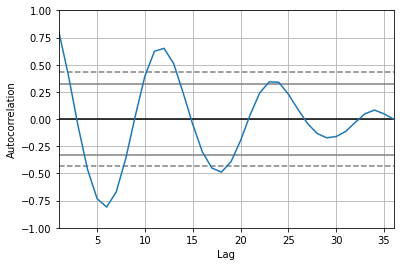

In [146]:
pd.plotting.autocorrelation_plot(aq_df_na['2014':'2016']['TEMP'].resample('1m').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

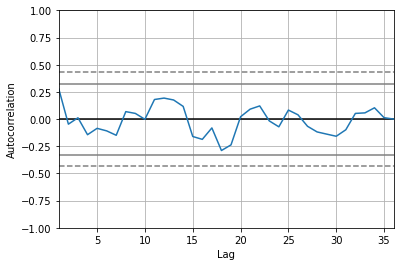

In [147]:
pd.plotting.autocorrelation_plot(aq_df_na['2014':'2016']['PM2.5'].resample('1m').mean())

# HERE IN THE PM2.5 EVERY THING IS WITHIN... AND AUTOCORRELATION IS LESS AS COMPARED TO IT...THERE IS SOME =VE TREND AND SOME
# SEASONALITY